In [1]:
import cv2
import numpy as np
import os, sys
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2
%matplotlib inline



In [2]:
CURR_PATH = os.path.dirname(os.path.realpath('__file__'))
ldir = os.getcwd().split(os.sep)
PROJ_ROOT = (os.sep).join(ldir[:ldir.index('data_assignments')+3])

DATA_EXT = os.path.join(PROJ_ROOT, 'data', 'external')
DATA_INTER = os.path.join(PROJ_ROOT, 'data', 'interim')
DATA_RAW = os.path.join(PROJ_ROOT, 'data', 'raw')
DATA_PROC = os.path.join(PROJ_ROOT, 'data', 'processed')

FIGURES = os.path.join(PROJ_ROOT, 'reports', 'figures')

In [3]:
!ls {DATA_RAW}

butterfly.jpg home.jpg      left.jpg      messi5.jpg    right.jpg


In [4]:
img = cv2.imread(DATA_RAW + os.sep + 'messi5.jpg')

In [5]:
px = img[100,100] # remember it is BGR here
print(px)
# accessing only blue pixel
blue = img[100,100,0]
print(blue)
# You can modify the pixel values the same way.

img[100,100] = [255,255,255]
print(img[100,100])

[157 166 200]
157
[255 255 255]


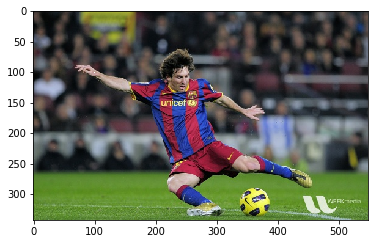

In [6]:
def display_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
display_img(img)

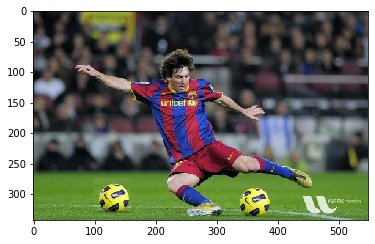

In [7]:

ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
display_img(img)

## Image Blending

In [8]:
img1 = cv2.imread(DATA_RAW + os.sep+ 'butterfly.jpg')
img2 = cv2.imread(DATA_RAW + os.sep + 'home.jpg')
print(img1.shape)
print(img2.shape)


(356, 493, 3)
(384, 512, 3)


In [9]:
!ls {DATA_RAW}

butterfly.jpg home.jpg      left.jpg      messi5.jpg    right.jpg


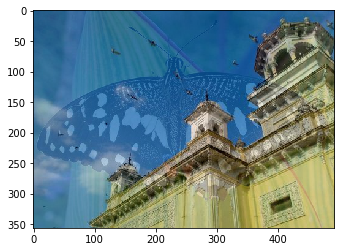

In [13]:
dst = cv2.addWeighted(img1[:356, :493],0.2,img2[:356, :493],0.8,0)
display_img(dst)


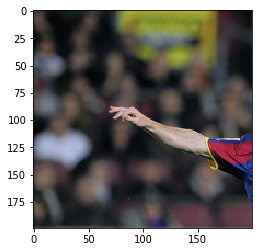

In [142]:
# Load two images
img1 = cv2.imread(DATA_RAW + os.sep +'messi5.jpg')
img2 = cv2.imread(DATA_RAW + os.sep + 'opencv_logo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
display_img(roi)

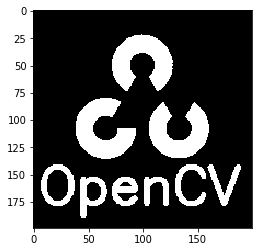

In [143]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
display_img(mask)

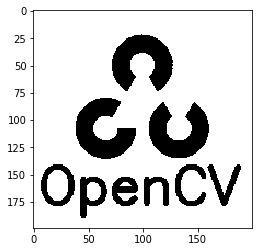

In [147]:
mask_inv = cv2.bitwise_not(mask)
display_img(mask_inv)


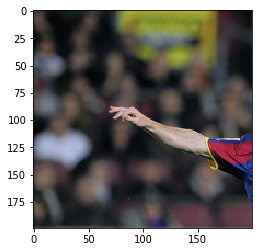

In [138]:
display_img(roi)

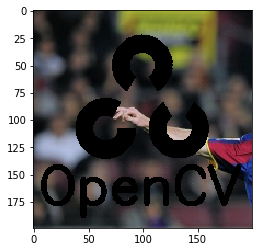

In [154]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi, mask = mask_inv) 
# conjunction of roi and roi (intersection(roi, roi)), 
# mask is a rule says if the mask[i]!=0 then execute this conjunction operation else 0
# essentially what mask does in this case is to pick out the part of image where mask is white

display_img(img1_bg)

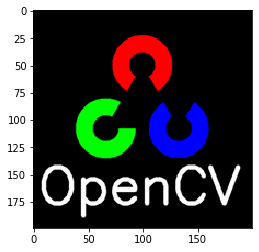

In [140]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
display_img(img2_fg)

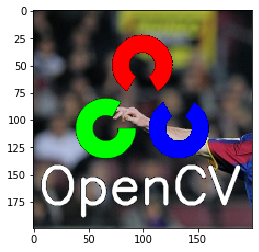

In [141]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
display_img(dst)

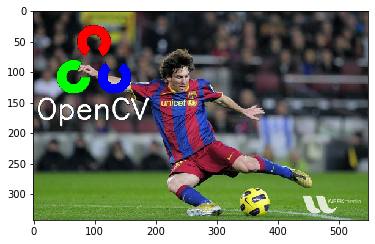

In [155]:
img1[0:rows, 0:cols ] = dst
display_img(img1)